# **Introducción a Python**

- Una de las multiples maneras de acceder a python es mediante Anaconda, donde se puede obtener algunas interfaces para manejar este programa. [vinculo para descargar anaconda](https://www.anaconda.com/products/individual)

In [15]:
import pandas as pd
import numpy as np

## **Instalación de paquetes**

- La instalación de paquetes en python se puede realizar de multiples maneras. La más sencilla de estas es a través del comando "pip install nombre_paquete".

## **Numpy (Manejo de marices)**

- Definición de vectores como numpy arrays

In [4]:
dato=np.array([1,2,3]) ##definir un vector
dato1=np.arange(2, 10) ##definir un vector con números del 2 al 10
v2 = np.ones(3)
v2

array([1., 1., 1.])

- Operaciones con vectores

In [23]:
##sumas de vectores
a = np.array([2, 6, 9, 10])
b = np.array([2, 4, 9, 11])
a+b


array([ 4, 10, 18, 21])

In [24]:
##resta de vectores
a-b

array([ 0,  2,  0, -1])

In [25]:
##Multiplicación de vectores por un escalar
3*b

array([ 6, 12, 27, 33])

In [26]:
##producto scalar
np.dot(a,b)

219

- Definición de matrices como numpy arrays

In [28]:
c = np.array([[5, 3],
              [1, 0]])

d = np.array([[1, 0],
              [7, 5]])
c

array([[5, 3],
       [1, 0]])

In [ ]:
identidad=np.eye(3) ##crear matriz identidad 3*3
diagonal=np.diag([1, 2, 3]) ##definir matriz 3*3 con diagonal definida
ceros=np.zeros((2, 3)) ## matriz de ceros 2*3

- Operaciones de matrices

In [34]:
##sumas de matrices
c+d

array([[6, 3],
       [8, 5]])

In [18]:
## Multiplicación de matrices
c.dot(d)

array([[26, 15],
       [ 1,  0]])

In [35]:
## Imprimir dimensiones de una matriz
c.shape

(2, 2)

In [36]:
##elementos totales de una matriz
c.size

4

In [37]:
##inversa de una matriz
np.linalg.inv(c)

array([[ 1.11022302e-17,  1.00000000e+00],
       [ 3.33333333e-01, -1.66666667e+00]])

In [38]:
## Determinante de una matriz
np.linalg.det(d)

4.999999999999998

In [39]:
## Traspuesta de una matriz
##c.T
np.transpose(c)

array([[5, 1],
       [3, 0]])

### **¿Cómo calcular MCO con numpy?**

- Para esto primero vamos a simular los datos de nuestras variables dependientes e independientes. Para esto debemos instalar la libreria random

In [18]:
import random

In [32]:
## Definimos una semilla para que nuestros resultados sean replicables
np.random.seed(9876789)

- Ahora vamos a simular las variables, de distribuciones normales con mu y sigmas definidos, y agregar un vector de unos para calcular el intercepto. 

In [49]:
X=np.random.normal(3, 2.5, size=(7000, 9))
Y=np.random.normal(40, 250, size=(7000, 1))
v = np.ones((7000, 1))
X1 = np.c_[v, X]

- Teniendo ya nuestra data simulada podemos aplicar la expresión analítica de los estimadores de MCO
\begin{equation}
\hat{\beta}=(X'X)^{-1}X'y
\end{equation}

In [50]:
beta_estimados = (np.linalg.inv(X1.T.dot(X1))).dot(X1.T.dot(Y))

In [51]:
beta_estimados

array([[35.05108084],
       [-0.24294684],
       [ 0.65479819],
       [-0.17125465],
       [-1.07571486],
       [-1.64156742],
       [ 0.86446528],
       [ 0.93448394],
       [ 0.85726027],
       [ 0.21346173]])

- Podemos verificar este resultado con diferentes librerias que ya tienen dentro de ellas funciones para calcular los estimadores de MCO, en este caso lo haremos como la libreria [Spreg.ols](https://spreg.readthedocs.io/en/latest/generated/spreg.OLS.html)

In [145]:
pip install spreg.OLS

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement spreg.OLS (from versions: none)
ERROR: No matching distribution found for spreg.OLS


In [52]:
from spreg import OLS
ols=OLS(Y, X1)
ols.betas

array([[35.05108084],
       [-0.24294684],
       [ 0.65479819],
       [-0.17125465],
       [-1.07571486],
       [-1.64156742],
       [ 0.86446528],
       [ 0.93448394],
       [ 0.85726027],
       [ 0.21346173]])

In [53]:
print(ols.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     dep_var                Number of Observations:        7000
Mean dependent var  :     36.3666                Number of Variables   :          10
S.D. dependent var  :    251.5773                Degrees of Freedom    :        6990
R-squared           :      0.0007
Adjusted R-squared  :     -0.0006
Sum squared residual:442682355.377                F-statistic           :      0.5128
Sigma-square        :   63330.809                Prob(F-statistic)     :      0.8665
S.E. of regression  :     251.656                Log likelihood        :  -48624.011
Sigma-square ML     :   63240.336                Akaike info criterion :   97268.023
S.E of regression ML:    251.4763                Schwarz criterion     :   97336.559

----------------------------------------------------------------------------

## **Listas**

In [59]:
ff=lista[2:4]

In [68]:
lista=[1,3,4,5,3]
#lista['Rafael','andres'] lista compuesta de strings

In [32]:
lista[0]
##lista[1:3]
##lista[-1] ultimo elemento de la lista

[3, 4]

In [62]:
lista.remove(lista[1]) ## Es analogo a lista.pop(1)

In [66]:
random.shuffle(lista) ##organiza aleatoriamente la lista

In [69]:
lista.append(7)

In [71]:
pd.DataFrame(lista)

,0
0,1
1,3
2,4
3,5
4,3
5,7


## **Pandas**

**Importar bases de datos**
- Datos sacados de [kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv)

In [72]:
data=pd.read_csv('train.csv')
##data=pd.read_excel('nombre archivo.xlsx', sheet_name='pagina1') para leer una página de un archivo de excel, si es solo una página se borra el "sheet_name"
##data=pd.read_pickle('nobre archivo.pkl') para leer archivos tipo pickle


**Visualización bases de datos**

In [73]:
data.head() ## muestra las primeras 5 filas de la base de datos
##data.tail() muestra las ultimas 5 filas
##data.columns muestra el nombre de todas las columnas de la base de datos

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**¿Cómo ver las dimensiones de la base de datos?**

In [78]:
data.shape

(1460, 81)

**Sintaxis para crear una nueva columna a partir de otras columnas**

In [80]:
data['precio_m2']=data['SalePrice']/data['LotArea']

**Cortes en la base de datos**
1. Cortes por filas
2. Cortes por columnas
3. Cortes por una condición dada
4. Tomar un dato de una columna y fila específica


In [82]:
data[:100] ##muestra unicamente los primeros 100 registros

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,precio_m2
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,24.674556
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,18.906250
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,19.866667
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,14.659686
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,17.531557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,...,NaN,NaN,Shed,480,4,2009,WD,Normal,185000,18.945212
96,97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2006,WD,Normal,214000,20.849571
97,98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,94750,8.675945
98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000,7.811765


In [83]:
data[['SalePrice','LotArea','SalePrice']]##muestra unicamente las columnas seleccionadas dentro de los corchetes

,SalePrice,LotArea,SalePrice
0,208500,8450,208500
1,181500,9600,181500
2,223500,11250,223500
3,140000,9550,140000
4,250000,14260,250000
...,...,...,...
1455,175000,7917,175000
1456,210000,13175,210000
1457,266500,9042,266500
1458,142125,9717,142125


In [84]:
data[data['precio_m2']>data['precio_m2'].mean()]##muestra aquellos inmuebles donde el precio por m2 sea mayor al primedio

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,precio_m2
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,24.674556
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,30.444268
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,21.225490
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2006,New,Partial,345000,28.933244
13,14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,New,Partial,279500,26.239204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2009,New,Partial,287090,30.996545
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2006,WD,Normal,145000,39.455782
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2009,WD,Normal,185000,24.666667
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,22.104332


**Documentación de iloc** : [iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)

In [29]:
data['precio_m2'].iloc[0]

24.674556213017752

**Agrupación (groupby)**

In [19]:
data.groupby('Neighborhood').agg({'precio_m2':'mean'})
##data.groupby('Neighborhood').agg({'precio_m2':'mean','SalePrice','median'})
##data.groupby('Neighborhood').agg({'id':'count'})
##data.groupby(['Neighborhood','SaleCondition']).agg({'precio_m2':'mean'})



,precio_m2
Neighborhood,
Blmngtn,57.643934
Blueste,86.410256
BrDale,58.323157
BrkSide,17.500370
ClearCr,13.780805
CollgCr,21.393421
Crawfor,21.043650
Edwards,15.475815
Gilbert,18.575884


1. **Renombrar columnas**
2. **Eliminar columnas**
3. **Eliminar filas donde hay datos nulos en columnas determinadas**
4. **Eliminar duplicados en una columna**

In [90]:
data=data.rename(columns={'precio_m2':'price_m2'})

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,price_m2
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,24.674556
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,18.906250
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,19.866667
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,14.659686
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,17.531557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,22.104332
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,15.939279
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,29.473568
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,14.626428


In [27]:
data=data.drop(columns=['MSZoning'])

In [28]:
data=data.dropna(subset=['price_m2'])

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,precio_m2
0,1,60,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,24.674556
1,2,20,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,18.906250
2,3,60,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,19.866667
3,4,70,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,14.659686
4,5,60,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,17.531557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,22.104332
1456,1457,20,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,15.939279
1457,1458,70,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,29.473568
1458,1459,20,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,14.626428


In [38]:
data=data[data['Id'].duplicated()==False] ## Crea una base donde no hay duplicados en la variable Id
##data=data[data.duplicated()==False]

- Ver estadísticas descriptivas de variables continuas

In [91]:
data[['SalePrice','LotFrontage','LotArea','FullBath','TotRmsAbvGrd','GarageCars']].describe()

,SalePrice,LotFrontage,LotArea,FullBath,TotRmsAbvGrd,GarageCars
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,70.049958,10516.828082,1.565068,6.517808,1.767123
std,79442.502883,24.284752,9981.264932,0.550916,1.625393,0.747315
min,34900.000000,21.000000,1300.000000,0.000000,2.000000,0.000000
25%,129975.000000,59.000000,7553.500000,1.000000,5.000000,1.000000
50%,163000.000000,69.000000,9478.500000,2.000000,6.000000,2.000000
75%,214000.000000,80.000000,11601.500000,2.000000,7.000000,2.000000
max,755000.000000,313.000000,215245.000000,3.000000,14.000000,4.000000


**A continuación vamos a ver como hacer algunas gráficas con ayuda de la libreria [matplotlib](https://matplotlib.org/)**

In [51]:
##pip install matplotlib
import matplotlib.pyplot as plt

- El primer ejemplo que vamos a ver es como realizar histogramas, en este caso vamos a ver como se distribuye los precios de los inmuebles para distintos tamaños de lotes

In [ ]:
## &=y o=|

In [93]:
b=data[(data['LotArea']<7553.500000)]
a=data[(data['LotArea']>7553.500000)&(data['LotArea']<9478.500000)]
c=data[(data['LotArea']>9478.500000)]

In [94]:
c

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,precio_m2
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,18.906250
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,19.866667
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,14.659686
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,17.531557
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,10.131066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1449,50,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdWo,NaN,0,5,2007,WD,Normal,112000,9.518144
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500,4.907940
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,15.939279
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,14.626428


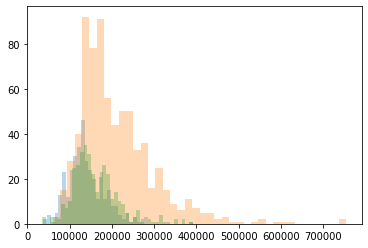

In [78]:
fig, ax = plt.subplots()
kwargs = dict(histtype='stepfilled', alpha=0.3,  bins=40)

ax.hist(b['SalePrice'], **kwargs)
ax.hist(c['SalePrice'], **kwargs)
ax.hist(a['SalePrice'], **kwargs)

fig.savefig("histogramas.png")

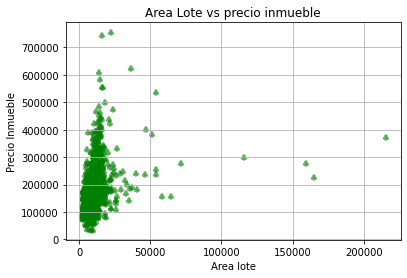

In [87]:
fig, ax = plt.subplots()
ax.scatter(data['LotArea'],data['SalePrice'], c="g", alpha=0.5, marker=r'$\clubsuit$',
            label="Luck") 
ax.set(xlabel='Area lote', ylabel='Precio Inmueble',
       title='Area Lote vs precio inmueble')
ax.grid()
fig.savefig("scatter.png")

**Guardar bases de datos**

In [ ]:
##data.to_excel('nombre_archivo.xlsx')
##data.to_csv('nombre_archivo.csv')
##data.to_pickle('nombre_archivo.pkl')

## **For loops**
- Un for loop es un procedimiento donde se le aplica una función determinada a unos objetos determinados. Estos objetos pueden ser los objetos que constituyen una lista, un DataFrame, etc. Un ejemplo que permite entender claramente la dinámica de un for loop es una sumatoria.El siguiente ejemplo muestra como resolver mediante un loop la siguiente operación:
$ \sum \limits _{i=1} ^{10} i$

In [25]:
a=0
for i in range(1,11):
    a=a+i
    print(a)

    

1
3
6
10
15
21
28
36
45
55


En el anterior ejemplo se ve como se puede usar el comando range para delimitar el rango por el cual se quiere iterar. El límite derecho de este rango no se toma. Ahora, supongamos que tenemos una lista de strings de donde queremos sacar un substring, en este caso tenemos string que contiene dentro un precio el cual queremos tener como un integrer. Este tipo de procedimientos es muy frecuente en la construcción de bases de datos


In [31]:
from tqdm import tqdm
lista=['precio:12.222','precio:55.000','precio:77.223','cio:89.545','precio:123.656','fhdjs','precio:99.878']
precios=[]
for i in tqdm(lista):
    try:
        precios.append(int(i.split(':')[1].replace('.','')))
    except:pass
precios

100%|██████████| 7/7 [00:00<?, ?it/s]


[12222, 55000, 77223, 89545, 123656, 99878]

- En este ejemplo quise ejemplificar el uso del comando **tqdm**. Este comando permite ver cuanto tiempo se demora cada iteración. En el ejemplo anterior no es muy relevante pues las iteraciones son rapidas y son pocas, pero esto puede ser muy util a la hora de tener procesos largos para estimar el tiempo que estos tomaran. Por otro lado, también se muestra el uso del comando **try**. Este es usado cuando en una de las iteraciones no se puede llevar a cabo el procedimiento establecido, con el fin de que el proceso general no se detenga
- En el siguiente ejemplo quiero mostrar porque el uso de for loops no es muy eficiente, por lo cual debe intentarse buscar una solución alternativa de ser posible, aunque no siempre lo es. En los casos donde no lo es, recomiendo usar paralelismo, sobre todo trabajando bases de datos grandes, tema del que hablare levemente la clase que viene

In [ ]:
import random

In [32]:
pp=[]
hh=[]
for i in range(0,100000):
    pp.append(random.uniform(200,1000))
    hh.append(random.uniform(200,1000))

-Aquí tienen un ejemplo de como convertir listas de la misma longitud en un DataFrame

In [34]:
d={'pp':pp,'aa':hh}
data=pd.DataFrame(d)

In [37]:
%%time
data['yy']=data['aa']+data['pp']

Wall time: 8 ms


In [38]:
%%time
ej=[]
for i in range(0,len(pp)):
    ej.append(pp[i]+hh[i])

Wall time: 26.9 ms


El anterior ejemplo pretendía generar una lista que fuera el resultado de la suma de dos listas en cada posición. Como vemos, Pandas logra resolver este problema mucha más rápido, al convertirlo en una suma de vectores.

En algunos casos es más eficiente solucionar problemas para los cuales se quiera iterar por medio **recursión**. [Dejo este enlace para quien esté interesado](https://hackernoon.com/recursion-vs-looping-in-python-9261442f70a5)

## **Funciones**


In [61]:
def Fahrenheit_Celsius(lista,x):
    traduccion=[]
    if x=='f':
        for i in lista:
            traduccion.append((i-32)* 5/9) 
    elif x=='c':
        for i in lista:
            traduccion.append(( i* 9/5) + 32 )
    return traduccion
    
        

In [62]:
l=[100,150,200]
a=Fahrenheit_Celsius(l,'c')
    

**Función para calcular los estimadores de MCO**

In [45]:
def MCO(data, Y, X):
    la=X.append(Y)
    data=data.dropna(subset=X)
    Y1=data[Y].to_numpy()
    X1=data[X].to_numpy()
    l=Y1.shape[0]
    v = np.ones((l, 1))
    X2 = np.c_[v, X1]
    beta_estimados = np.linalg.inv(X2.T @ X2) @ X2.T @ Y1
    return beta_estimados

In [46]:
a=MCO(data,'SalePrice',['LotFrontage','LotArea','FullBath','TotRmsAbvGrd','GarageCars'])

## **Diccionarios**

Los diccionarios son un tipo de dato con el cual se puede relacionar un **key** con su imagen. Son utiles cuando se quiere relacionar una palabra con un valor en específico. Por ejemplo, si se quiere relacionar algunas personas con su edad, se podría pensar en algo como lo siguiente.


In [1]:
data={}
data['Rafael']=23
data['Daniela']=44
data['Jesus']=33

In [2]:
data

{'Rafael': 23, 'Daniela': 44, 'Jesus': 33}

In [3]:
data['Rafael']

23

Los diccionarios no permiten acceder a objetos dentro de ellos por medio de la posición de este objeto en el diccionario, como si ocurre con las listas. Tampoco permiten duplicados.


In [5]:
data[0]

KeyError: 0

Los diccionarios son muy utiles para ciertos procesos en programación, como veremos más adelante. Un tip que puede ser de utilidad es que pandas tiene programado en si una manera de convertir una lista de diccinarios en un DataFrame. Para mostrar esto, generare aleatorioamente una serie de diccinarios con características de algunas personas

In [19]:
%%time
datas=[]
a=0
for i in tqdm(range(0,10000)): 
    a+=1
    data={}
    data['id']=a ##Es importante tener un identificador unico por cada individuo
    data['altura']=random.normalvariate(1.66, 0.3)##se genera una observación aleatoria de una distribución normal con media y varianza definidas
    data['peso']=random.normalvariate(56, 0.3)
    datas.append(data)
    
    

100%|██████████| 10000/10000 [00:00<00:00, 357707.90it/s]

Wall time: 30.9 ms


In [22]:
data=pd.DataFrame(datas)

In [23]:
data

,id,altura,peso
0,1,1.232615,55.430352
1,2,1.684467,55.915907
2,3,1.458465,55.582554
3,4,1.949240,55.967801
4,5,1.331605,56.000718
...,...,...,...
9995,9996,1.582933,56.500257
9996,9997,1.694079,55.741432
9997,9998,2.000832,56.054465
9998,9999,2.077467,56.059562


## **Progamación en paralelo**

In [7]:
from multiprocessing.dummy import Pool
from multiprocessing import cpu_count

- Un ejemplo de cuando podría ser de utilidad un usar programación en paralelo es cuando se tiene un proceso iterativo, en el cual cada iteración no requiere la totalidad de la capacidad de procesamiento de la maquina en la cual corre. En este caso, pensar en poder realizar varias de estas iteraciones al mismo tiempo, o en paralelo, podría hacer los procesos mucho más eficientes. En esta clase vamos a ver una manera de aplicar programación el paralelo con la función pool.map() de la libreria multiprocessing

In [10]:
##Este comando permite ver la cantidad de cpu´s de la máquina, la libreria recomienda que el número de cpu´s sea igual al número procesos paralelos
cpu_count()

12

In [25]:
strings=[]
a=0
li=random.uniform(200,1000)
for i in range(0,1000000):
    a+=0
    if a==li:
        li=random.uniform(200,1000)
        a=0
        strings.append('sdfasdf')
    else:
        strings.append('precio:'+' '+str(random.uniform(200,1000)))

- Retomemos el ejemplo de más arriba donde queriamos extraer un precio de un string que lo contiene, pero ahora tenemos 1 millón de observaciones, por lo cual iterar puede resultar ineficiente. Para realizar el procesamiento en paralelo en este caso se debe:1) construir una función que

In [29]:
precio=[]
def extraer_precio(x):
    global strings,precio
    for i in strings[x:x+100000]:
        try:
            precio.append(int(i.split(':')[1].replace('.','')))
        except:pass 

In [30]:
f=[]
o=0
for i in range(0,10):
    f.append(0)
    o+=100000
pool=Pool(10)
paralelo=pool.map(extraer_precio,f)

- ¿cómo podemos aplicar esto para correr la función de mco mostrada más arriba paralelamente, donde cada proceso paralelo corra la función para una parte de la data?

In [16]:
data.groupby('LotShape').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
LotShape,,,,,,,,,,,,,,,,,,,,,
IR1,484,484,484,317,484,484,11,484,484,484,...,484,3,83,20,484,484,484,484,484,484
IR2,41,41,41,26,41,41,2,41,41,41,...,41,0,3,2,41,41,41,41,41,41
IR3,10,10,10,7,10,10,1,10,10,10,...,10,1,0,0,10,10,10,10,10,10
Reg,925,925,925,851,925,925,77,925,925,925,...,925,3,195,32,925,925,925,925,925,925
